In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rioxarray as rioxr
import xarray as xr
import geopandas as gpd

C:\Users\rmonaghan\AppData\Local\Temp\ipykernel_2224\807323952.py:7: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


----------------------------------------------------------------------------------------------------------------------------------------------
This notebook is very exploratory.  Note that not every cell is commented, some code is redundant, but it should be fairly straightforward to
see that that data is grouped by a grouper (various cause classification fields) for WF data and then visualized thorugh kernel density plots
(smoother-looking distribution plots)
 
----------------------------------------------------------------------------------------------------------------------------------------------

##### -----------------------<i>This code will require a good amount of modification to run------------------------

In [ ]:
df = pd.read_csv('')
df

C:\Users\rmonaghan\AppData\Local\Temp\ipykernel_2224\1857598722.py:1: DtypeWarning: Columns (5,25,26,27,28,29,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("F:/RMonaghan_Workspace/Projects/GRIDMET.SE_Burn_Permits/Exports/Output_CSVs_Scaled/Concatenated.csv")


Unnamed: 0    Fire_Type   LATITUDE  LONGITUDE        Date  \
0                0  Permit Burn  28.338693 -81.997242    1/5/2010   
1                1  Permit Burn  26.211039 -80.853461   2/15/2010   
2                2  Permit Burn  26.986194 -81.752400   2/15/2010   
3                3  Permit Burn  30.062746 -83.170193   1/15/2010   
4                4  Permit Burn  26.420478 -81.157662    1/3/2010   
...            ...          ...        ...        ...         ...   
145162       20555     Wildfire  30.696500 -87.235300   3/16/2020   
145163       20556     Wildfire  30.472506 -86.788616   4/28/2020   
145164       20557     Wildfire  30.483061 -86.841116  11/17/2020   
145165       20558     Wildfire  30.494172 -86.839171   3/19/2020   
145166       20559     Wildfire  30.457506 -86.781394   5/14/2020   

                             BURN_TYPE  ACRES      DOF_DISTRI  tmmn_F  tmmx_F  \
0        Silvicultural--Hazard removal  100.0   Withlacoochee   47.03   46.85   
1        Silvicultural--Hazard removal  500.0      Everglades   63.77   73.13   
2                Agricultural--Pasture    5.0    Myakka River   57.83   71.69   
3                Agricultural--Pasture    1.0           Perry   55.49   71.51   
4       Agricultural--Range management  200.0  Caloosahatchee   53.33   55.85   
...                                ...    ...             ...     ...     ...   
145162                             NaN    NaN      Blackwater   76.91   81.23   
145163                             NaN    NaN      Blackwater   76.91   80.15   
145164                             NaN    NaN      Blackwater   59.45   72.59   
145165                             NaN    NaN      Blackwater   84.83   81.41   
145166                             NaN    NaN      Blackwater   85.37   82.13   

        ...           FIRE_NAME  MTBS_FIRE_NAME  COMPLEX_NAME  DISCOVERY_DATE  \
0       ...                 NaN             NaN           NaN             NaN   
1       ...                 NaN             NaN           NaN             NaN   
2       ...                 NaN             NaN           NaN             NaN   
3       ...                 NaN             NaN           NaN             NaN   
4       ...                 NaN             NaN           NaN             NaN   
...     ...                 ...             ...           ...             ...   
145162  ...  TEN MILE ROAD (57)             NaN           NaN       3/16/2020   
145163  ...               PARTY           PARTY           NaN       4/28/2020   
145164  ...            MIDNIGHT        MIDNIGHT           NaN      11/17/2020   
145165  ...             WILDCAT         WILDCAT           NaN       3/19/2020   
145166  ...       MOSQUITO BITE             NaN           NaN       5/14/2020   

        DISCOVERY_DOY  DISCOVERY_TIME  NWCG_CAUSE_CLASSIFICATION  \
0                 NaN             NaN                        NaN   
1                 NaN             NaN                        NaN   
2                 NaN             NaN                        NaN   
3                 NaN             NaN                        NaN   
4                 NaN             NaN                        NaN   
...               ...             ...                        ...   
145162           76.0          1500.0                      Human   
145163          119.0             NaN                      Human   
145164          322.0             NaN                      Human   
145165           79.0             NaN                      Human   
145166          135.0             NaN                      Human   

                             NWCG_GENERAL_CAUSE  FIRE_SIZE  FIRE_SIZE_CLASS  
0                                           NaN        NaN              NaN  
1                                           NaN        NaN              NaN  
2                                           NaN        NaN              NaN  
3                                           NaN        NaN              NaN  
4                         

In [9]:
# dividing WF data by NWCG General Cause 

df['NWCG_CAUSE_CLASSIFICATION'].unique(), df['NWCG_GENERAL_CAUSE'].unique()

(array([nan, 'Human', 'Natural', 'Missing data/not specified/undetermined'],
       dtype=object),
 array([nan, 'Arson/incendiarism', 'Equipment and vehicle use', 'Natural',
        'Power generation/transmission/distribution',
        'Debris and open burning',
        'Missing data/not specified/undetermined',
        'Recreation and ceremony', 'Misuse of fire by a minor',
        'Fireworks', 'Smoking', 'Other causes',
        'Railroad operations and maintenance'], dtype=object))

In [17]:
# rows associated with each

df['NWCG_GENERAL_CAUSE'].value_counts()

Natural                                       5716
Debris and open burning                       4717
Missing data/not specified/undetermined       3412
Arson/incendiarism                            2968
Equipment and vehicle use                     1479
Recreation and ceremony                        733
Power generation/transmission/distribution     624
Misuse of fire by a minor                      457
Other causes                                   126
Fireworks                                      122
Smoking                                        108
Railroad operations and maintenance             98
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [18]:
# more general NWCG cause
# rows associated with each

df['NWCG_CAUSE_CLASSIFICATION'].value_counts()

Human                                      14782
Natural                                     5716
Missing data/not specified/undetermined       62
Name: NWCG_CAUSE_CLASSIFICATION, dtype: int64

In [76]:
# extracting only WF records from entire dfataset
# resmapling monthly mean and standard deviation by NWCG Cause Classification and General Cause

wf = df.query('Fire_Type=="Wildfire"').copy()
wf['Date'] = pd.to_datetime(wf['Date'])
wf = wf.set_index('Date')
wf_CC = wf.groupby('NWCG_CAUSE_CLASSIFICATION').resample('1M').std(numeric_only=True).reset_index()
wf_GC = wf.groupby('NWCG_GENERAL_CAUSE').resample('1M').std(numeric_only=True).reset_index()

In [77]:
wf_GC

NWCG_GENERAL_CAUSE       Date   Unnamed: 0  LATITUDE  LONGITUDE  ACRES  \
0     Arson/incendiarism 2010-01-31  6154.099791  1.426351   1.236685    NaN   
1     Arson/incendiarism 2010-02-28  5634.930717  1.480354   1.525420    NaN   
2     Arson/incendiarism 2010-03-31  6438.194893  1.497360   1.733049    NaN   
3     Arson/incendiarism 2010-04-30  5927.246953  1.290499   1.338912    NaN   
4     Arson/incendiarism 2010-05-31  5318.238053  0.935059   0.835755    NaN   
...                  ...        ...          ...       ...        ...    ...   
1559             Smoking 2020-08-31          NaN       NaN        NaN    NaN   
1560             Smoking 2020-09-30          NaN       NaN        NaN    NaN   
1561             Smoking 2020-10-31          NaN       NaN        NaN    NaN   
1562             Smoking 2020-11-30          NaN       NaN        NaN    NaN   
1563             Smoking 2020-12-31          NaN       NaN        NaN    NaN   

         tmmn_F     tmmx_F  etr_mm_scaled  fm100_pct_scaled  ...  \
0     15.904900  11.770051       1.045200          2.745168  ...   
1      8.310760   6.885931       0.842644          2.364261  ...   
2      8.141343   7.287870       1.090376          2.168668  ...   
3      5.821755   2.800849       1.185778          1.278971  ...   
4      2.467133   2.813970       0.906274          1.086815  ...   
...         ...        ...            ...               ...  ...   
1559        NaN        NaN            NaN               NaN  ...   
1560        NaN        NaN            NaN               NaN  ...   
1561        NaN        NaN            NaN               NaN  ...   
1562        NaN        NaN            NaN               NaN  ...   
1563        NaN        NaN            NaN               NaN  ...   

      sph_kg_per_kg  srad_W_per_m2  th_deg_clockwise_from_N  vs_m_per_s  \
0          0.003798      31.592376               111.359037    1.850163   
1          0.002387      38.261588                90.939960    1.557146   
2          0.001851      47.629709                99.264378    1.372408   
3          0.001491      48.099533                69.456561    1.457065   
4          0.001346      43.180412                93.663026    0.984886   
...             ...            ...                      ...         ...   
1559            NaN            NaN                      NaN         NaN   
1560            NaN            NaN                      NaN         NaN   
1561            NaN            NaN                      NaN         NaN   
1562            NaN            NaN                      NaN         NaN   
1563            NaN            NaN                      NaN         NaN   

       vpd_kPA  erc_g_unitless        FOD_ID  DISCOVERY_DOY  DISCOVERY_TIME  \
0     1.673160        7.524648  1.434103e+08       8.186333      321.348865   
1     1.617005        6.293323  7.408344e+07       7.141428      293.876725   
2     2.341813        6.551276  5.700013e+07       7.105438      223.073191   
3     2.015926        4.479006  1.892881e+08       7.199475      280.185667   
4     2.110608        5.149434  1.404104e+05       7.371115      627.712590   
...        ...             ...           ...            ...             ...   
1559       NaN             NaN           NaN            NaN             NaN   
1560       NaN             NaN           NaN            NaN             NaN   
1561       NaN             NaN           NaN            NaN             NaN   
1562       NaN             NaN           NaN            NaN             NaN   
1563       NaN             NaN           NaN            NaN             NaN   

       FIRE_SIZE  
0     310.955716  
1     308.647841  
2      36.256906  
3      42.246050  
4      54.150008  
...          ...  
1559         NaN  
1560         NaN  
1561         NaN  
1562         NaN  
1563         NaN  

[1564 rows x 25 columns]

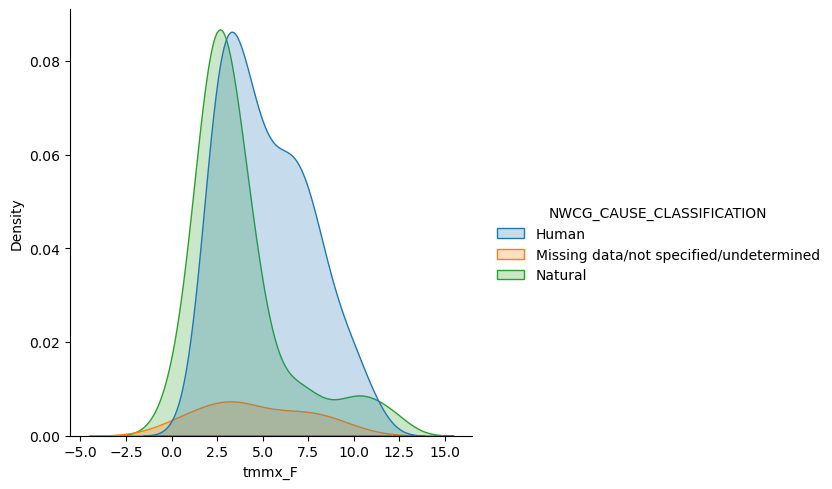

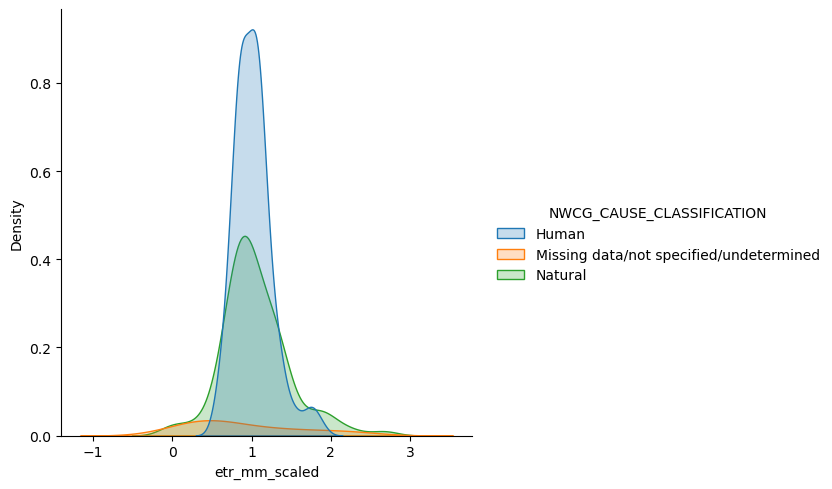

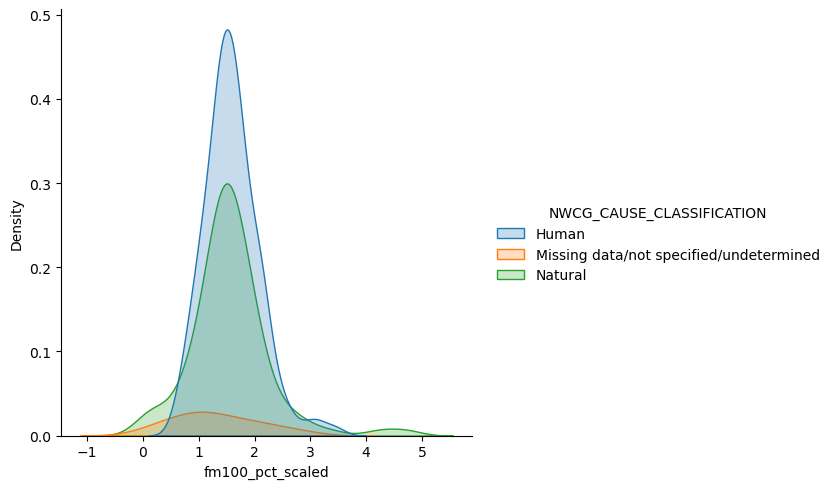

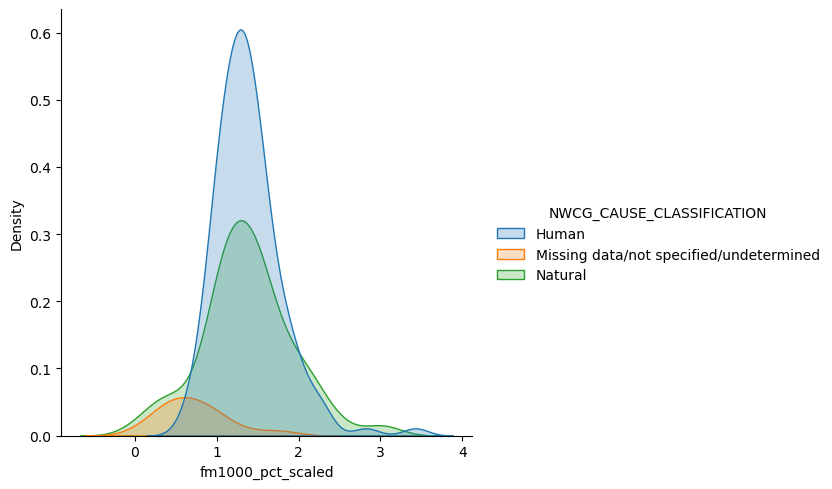

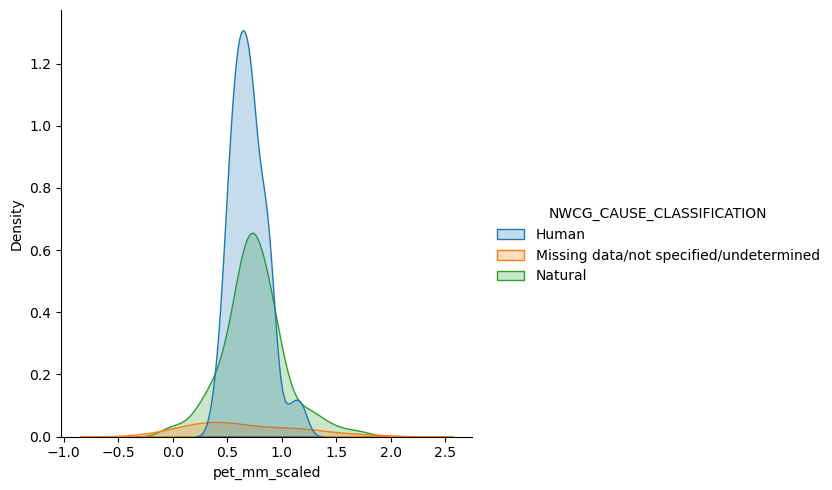

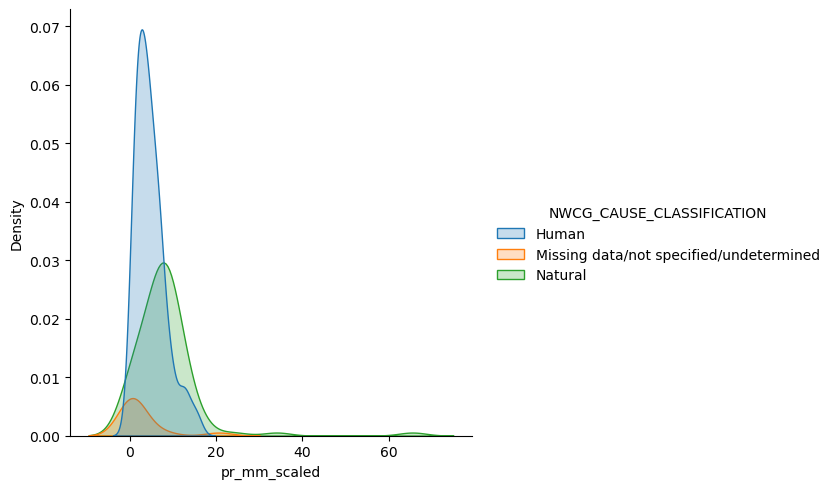

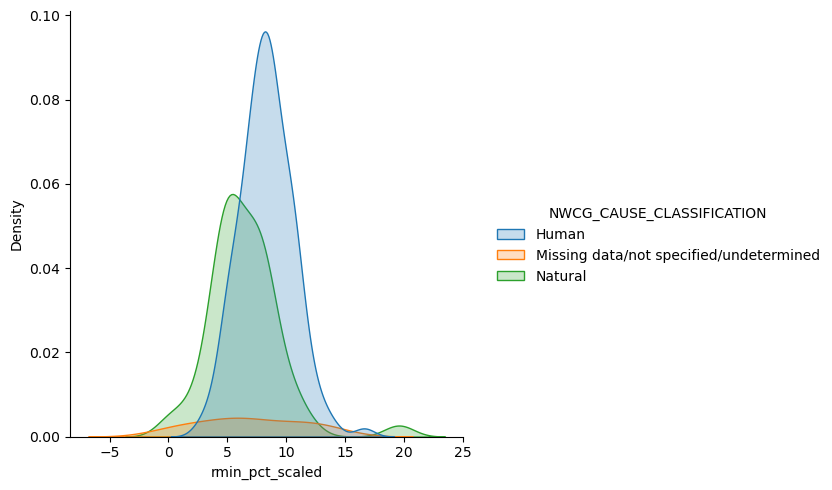

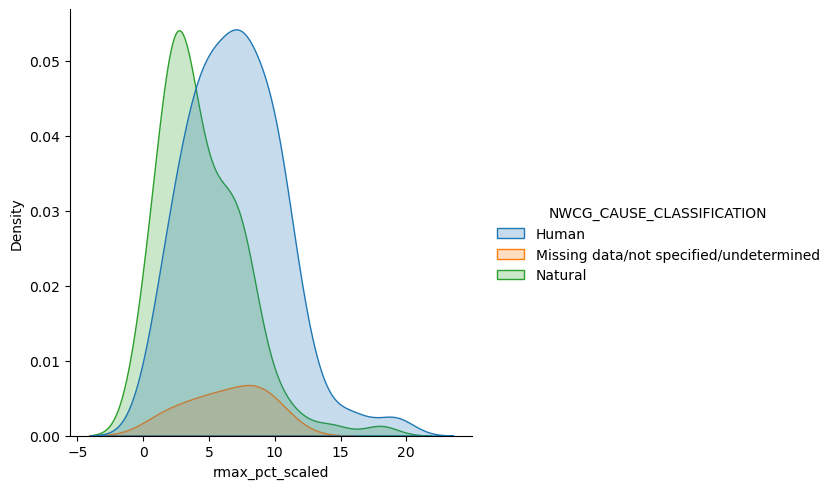

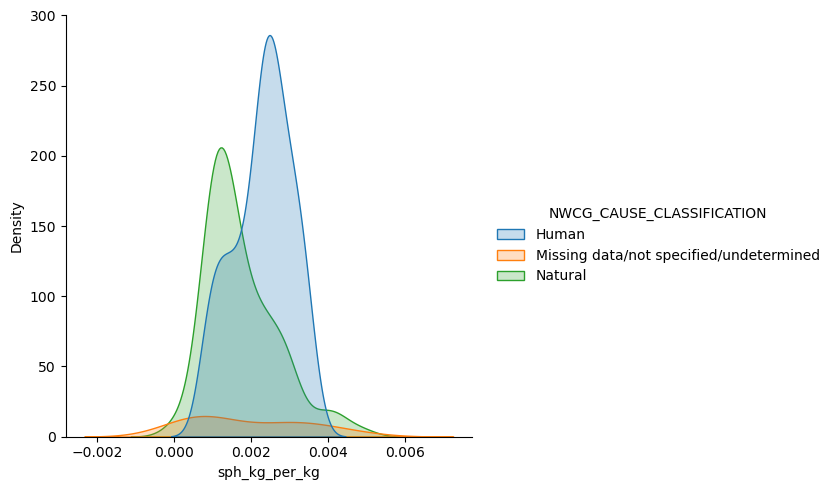

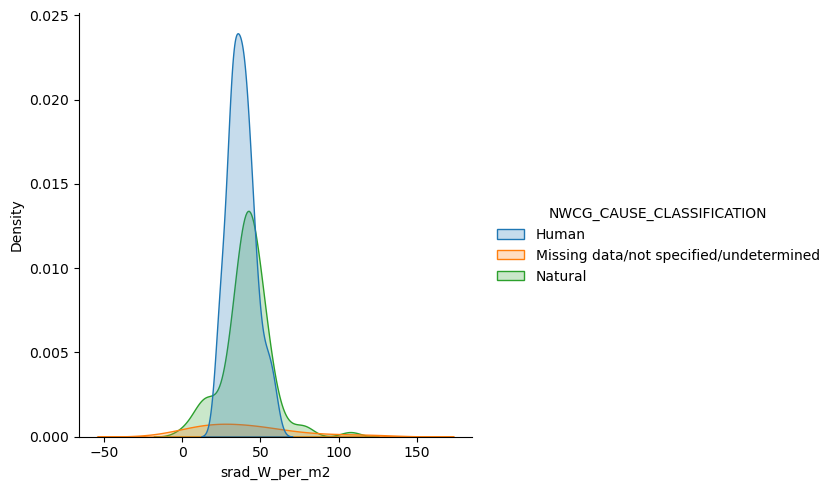

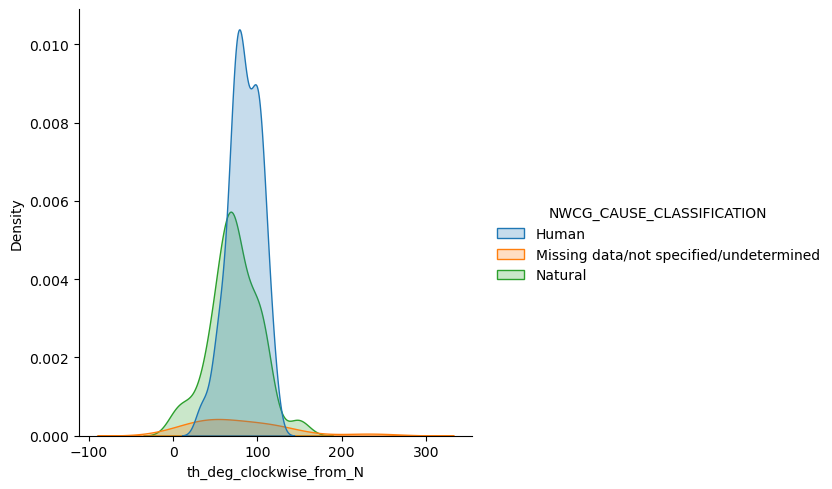

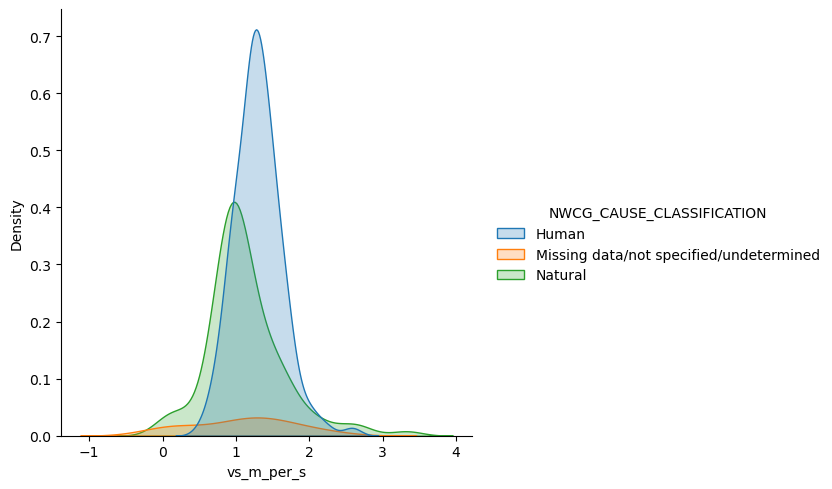

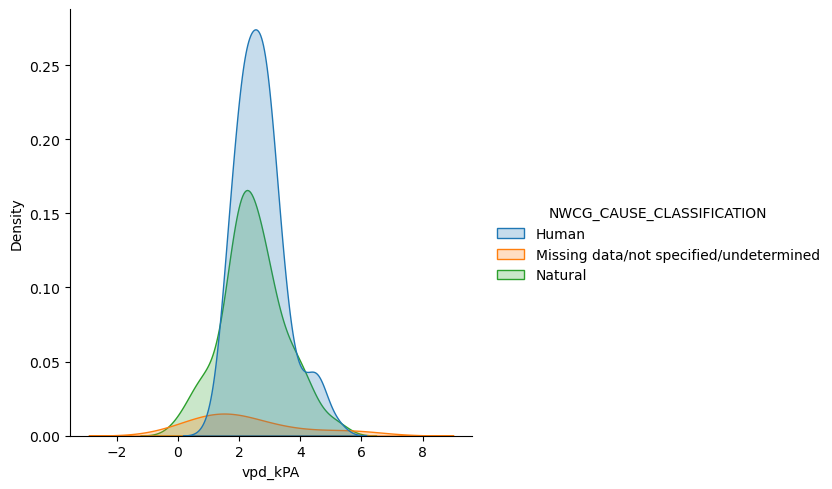

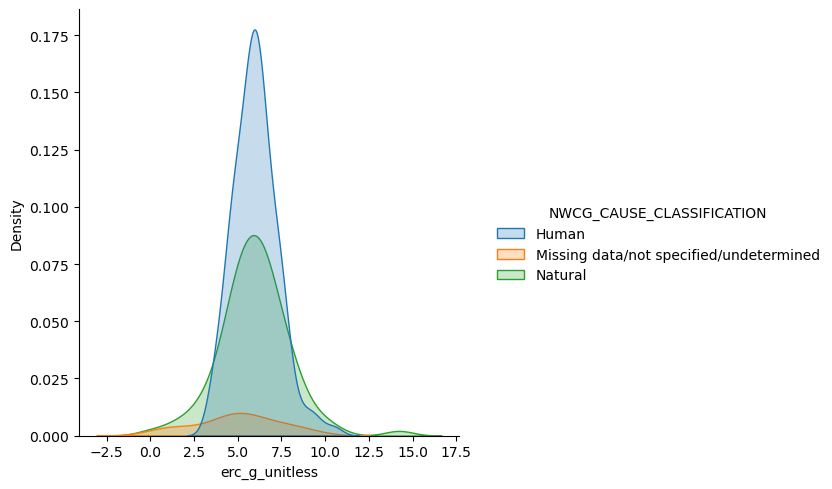

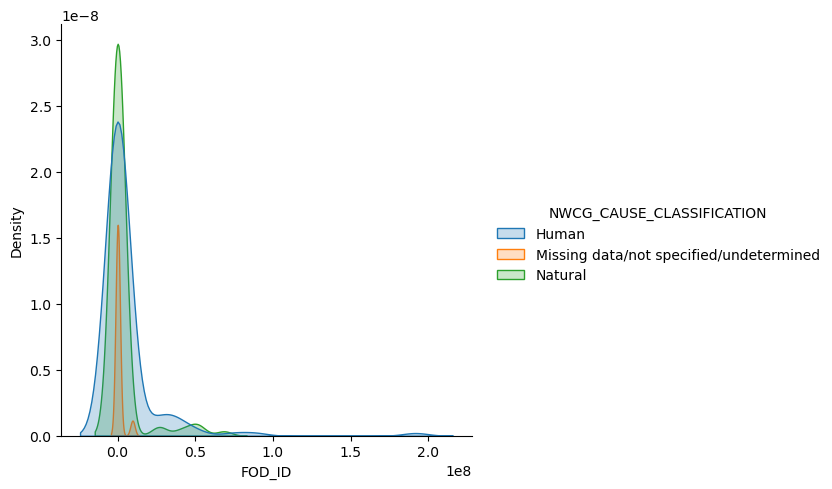

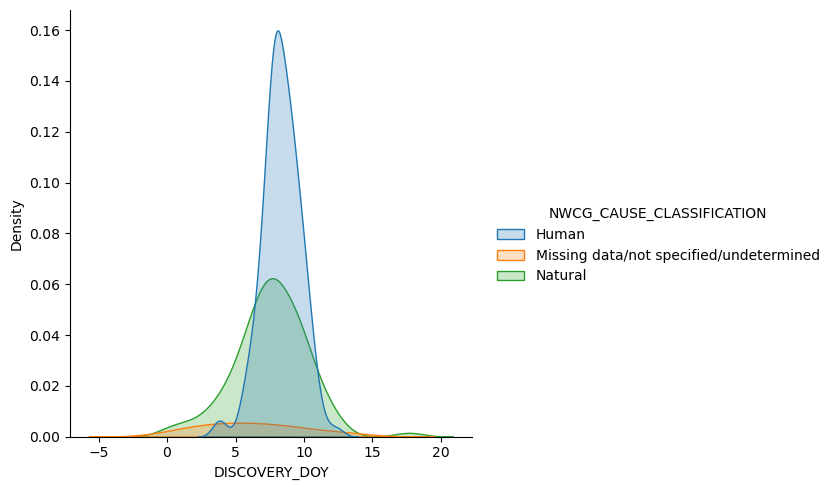

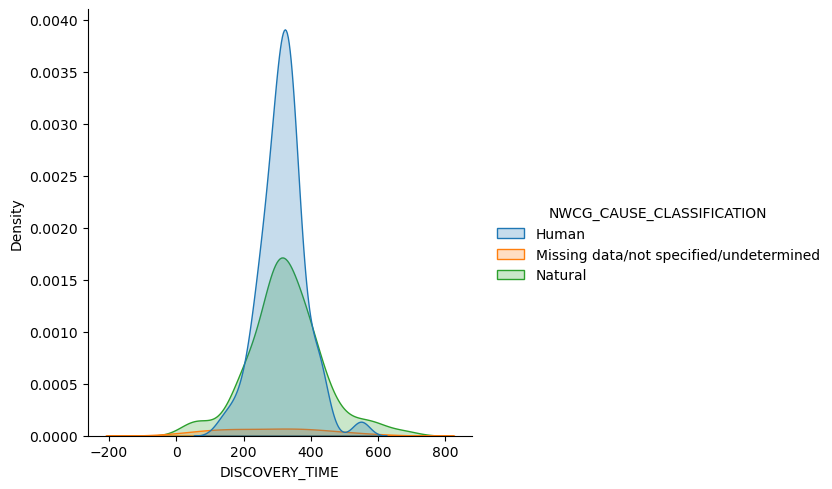

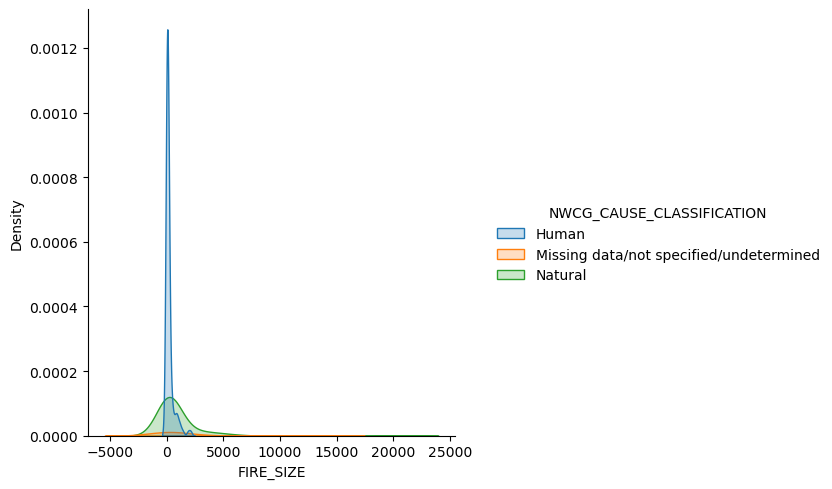

In [78]:
for i in wf_GC.columns[7:]:
    sns.displot(x=wf_CC[f"{i}"], hue=wf_CC['NWCG_CAUSE_CLASSIFICATION'], kind='kde', fill=True)